## Monte Carlo - Euler Discretization - Part I

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download the data for Microsoft (‘MSFT’) from Google Finance for the period ‘2007-1-1’ until '2017-3-21'.

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'MSFT'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='google', start='2007-1-1', end='2017-3-21')['Close']

Store the annual standard deviation of the log returns in a variable, called “stdev”.

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,MSFT
Date,
2017-03-15,0.005265
2017-03-16,-0.001700
2017-03-17,0.003552
2017-03-20,0.000924
2017-03-21,-0.011151


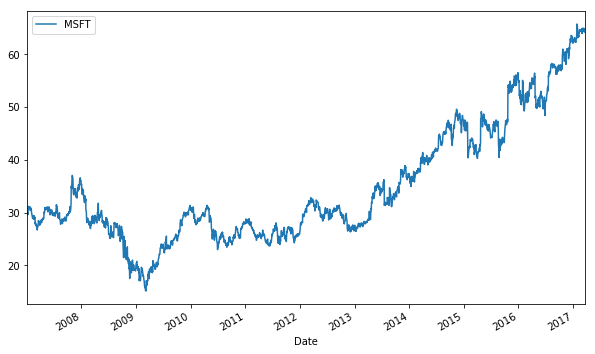

In [5]:
data.plot(figsize=(10, 6));

In [6]:
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.279199
dtype: float64

Set the risk free rate, r, equal to 2.5% (0.025).

In [7]:
r = 0.025

To transform the object into an array, reassign stdev.values to stdev.

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([ 0.27919924])

Set the time horizon, T, equal to 1 year, the number of time intervals equal to 250, the iterations equal to 10,000. Create a variable, delta_t, equal to the quotient of T divided by the number of time intervals.

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

Let Z equal a random matrix with dimension (time intervals + 1) by the number of iterations. 

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  

Use the .zeros_like() method to create another variable, S, with the same dimension as Z. S is the matrix to be filled with future stock price data. 

In [12]:
S = np.zeros_like(Z) 

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [13]:
S0 = data.iloc[-1]  
S[0] = S0 

Use the following formula to create a loop within the range (1, t_intervals + 1) that reassigns values to S in time t.

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^2 \cdot Z_t)
$$

In [14]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [15]:
S

array([[ 64.21      ,  64.21      ,  64.21      , ...,  64.21      ,
         64.21      ,  64.21      ],
       [ 63.64604297,  63.09937557,  62.42721177, ...,  62.91855106,
         65.3240022 ,  66.46424364],
       [ 63.22053717,  64.77745729,  63.27152759, ...,  62.26765107,
         66.15474549,  65.89880626],
       ..., 
       [ 78.00218761,  71.40310505,  32.85699409, ...,  75.56002207,
         99.37715873,  80.25739375],
       [ 79.84246721,  69.36268081,  33.74218677, ...,  74.39394544,
         98.41713749,  80.230935  ],
       [ 81.66676815,  70.06242131,  33.14506559, ...,  73.84915185,
         98.84681945,  79.92684929]])

In [16]:
S.shape

(251L, 10000L)

Plot the first 10 of the 10,000 generated iterations on a graph.

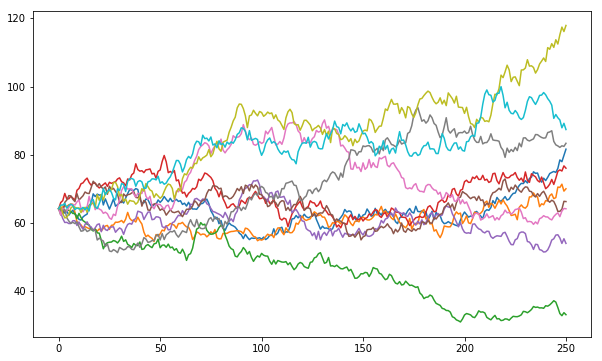

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);